In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [23]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
#Checking Missing Value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
#Checking Outlier
char_col = []
num_col = []
for col in df.columns:
    if df[col].dtypes != 'object':
        num_col.append(col)
    else:
        char_col.append(col)
print('String columns ({}) : {}'.format(len(char_col), char_col))
print('-'*50)
print('Numerical columns ({}): {}'.format(len(num_col), num_col))

String columns (1) : ['date']
--------------------------------------------------
Numerical columns (20): ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


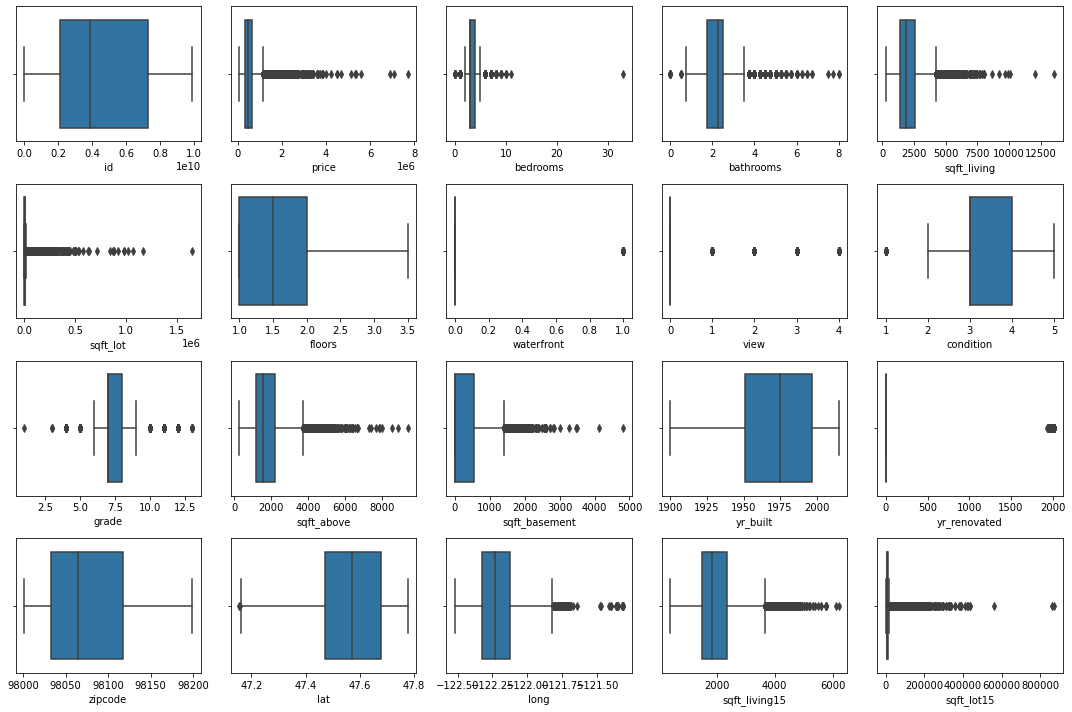

In [29]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_col):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

#### Describe Data

In [30]:
df.describe(include='O')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [32]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [33]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[9415950020, 4019300051]"
1,date,object,0,0.0,372,"[20150207T000000, 20140825T000000]"
2,price,float64,0,0.0,4028,"[248000.0, 971000.0]"
3,bedrooms,int64,0,0.0,13,"[1, 10]"
4,bathrooms,float64,0,0.0,30,"[1.0, 4.0]"
5,sqft_living,int64,0,0.0,1038,"[3526, 3120]"
6,sqft_lot,int64,0,0.0,9782,"[12096, 1937]"
7,floors,float64,0,0.0,6,"[1.0, 1.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[2, 1]"


In [34]:
# Change type date from Object to datetime
df['date'] = df['date'].astype('datetime64')
df['date'].dtypes

dtype('<M8[ns]')

In [35]:
#Proses ekstrasi Date
sale_dt = df['date'].dt
df['year'] = sale_dt.year
df['month'] = sale_dt.month_name()
df['day'] = sale_dt.day

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,October,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,December,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,February,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,December,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,February,18


### Data Analyst & Data Visualization

### `price`

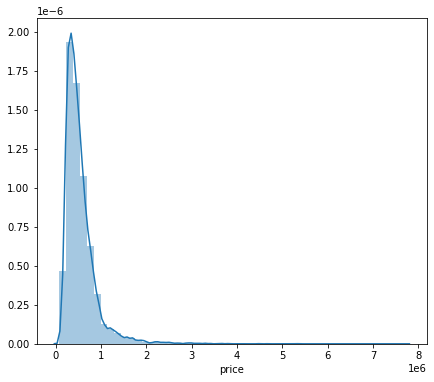

In [38]:
plt.figure(figsize=(7,6))
sns.distplot(df['price'])

- price has right-skewed-distribution

### `bedrooms`

In [40]:
df.stb.freq(['bedrooms'])

,bedrooms,count,percent,cumulative_count,cumulative_percent
0,3,9824,45.454125,9824,45.454125
1,4,6882,31.841947,16706,77.296072
2,2,2760,12.770092,19466,90.066164
3,5,1601,7.407579,21067,97.473743
4,6,272,1.258502,21339,98.732244
5,1,199,0.920742,21538,99.652987
6,7,38,0.175820,21576,99.828807
7,8,13,0.060149,21589,99.888956
8,0,13,0.060149,21602,99.949105
9,9,6,0.027761,21608,99.976866


In [98]:
#Median price for every bedrooms
df_bedrooms = df[['bedrooms', 'price']].groupby(['bedrooms']).median()
df_bedrooms.T

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
price,288000.0,299000.0,374000.0,413000.0,549997.5,620000.0,650000.0,728580.0,700000.0,817000.0,660000.0,520000.0,640000.0


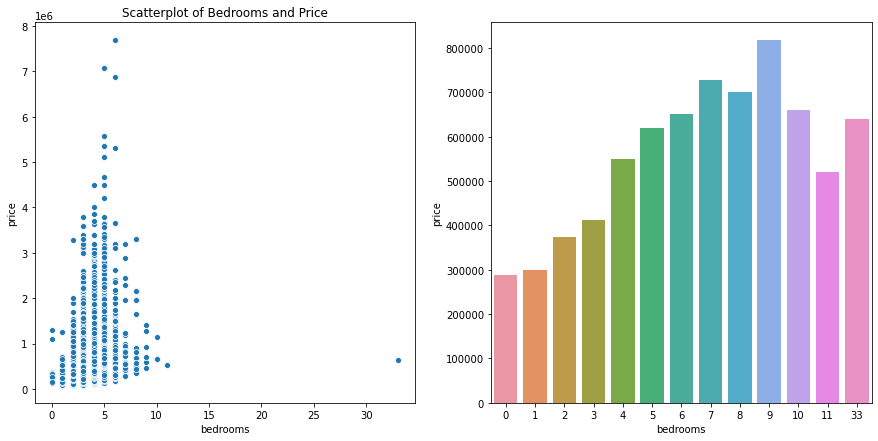

In [100]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.scatterplot(x=df['bedrooms'], y=df['price'])
plt.title('Scatterplot of Bedrooms and Price')

plt.subplot(1,2,2)
sns.barplot(x=df_bedrooms.index, y=df_bedrooms['price'], palette='magma')

- 9 bedrooms has the highest median house price while 0 bedrooms has the smallest median house price

### `bathrooms`

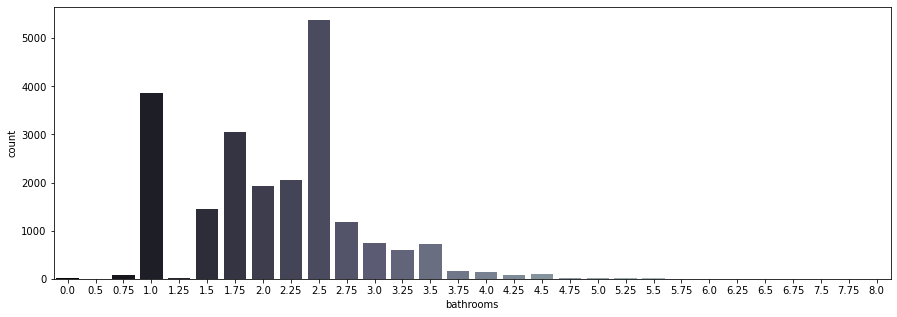

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(df['bathrooms'], palette='bone')

<Figure size 720x432 with 0 Axes>

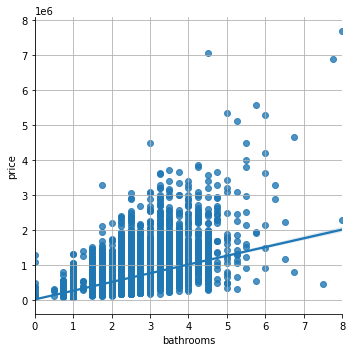

In [61]:
plt.figure(figsize=(10,6))
sns.lmplot(x='bathrooms', y='price', data=df)
plt.grid()

In [96]:
#Median price for every bathrooms
df_bathroom = df[['bathrooms', 'price']].groupby(['bathrooms']).median()
df_bathroom['price'].max() #==> 6885000.0
df_bathroom[df_bathroom['price'] == 6885000.0]

,price
bathrooms,
7.75,6885000.0


- mostly house has 2.5 bathrooms
- bathrooms and price has positive correlation, it means that more bathrooms will increase the price of house
- 7.75 bathrooms has the highest median price of house

### `sqft_living`

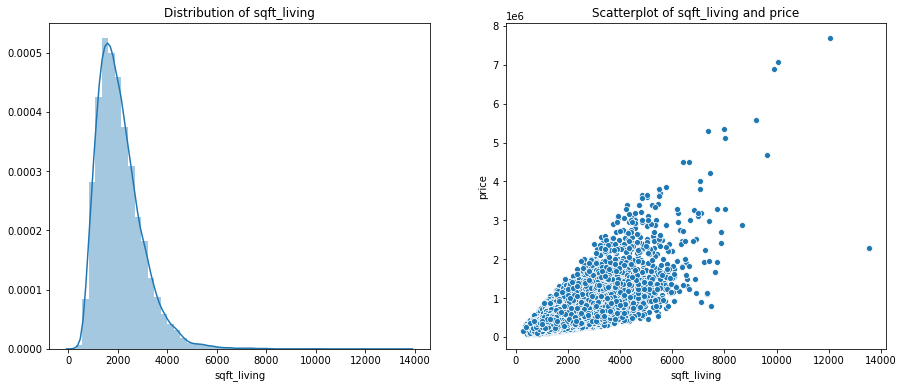

In [70]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['sqft_living'])
plt.title('Distribution of sqft_living')

plt.subplot(1,2,2)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Scatterplot of sqft_living and price')

plt.show()

- sqft_living has right-skwed-distribution
- From the scatterplot between sqft_living and price show positive correlation. The Wider the size of aqft_living will increase the price of house

### `sqft_lot`
square footage of land space

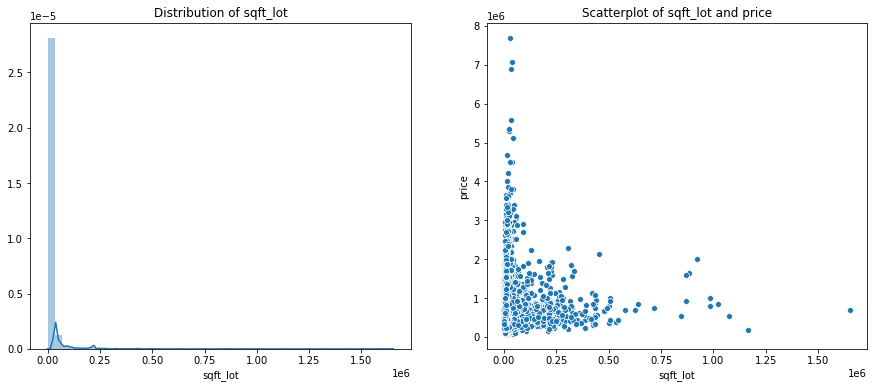

In [71]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['sqft_lot'])
plt.title('Distribution of sqft_lot')

plt.subplot(1,2,2)
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.title('Scatterplot of sqft_lot and price')

plt.show()

### `floors`

In [72]:
df.stb.freq(['floors'])

,floors,count,percent,cumulative_count,cumulative_percent
0,1.0,10680,49.414704,10680,49.414704
1,2.0,8241,38.129829,18921,87.544533
2,1.5,1910,8.837274,20831,96.381807
3,3.0,613,2.836256,21444,99.218063
4,2.5,161,0.744922,21605,99.962985
5,3.5,8,0.037015,21613,100.000000


In [86]:
#Median price for every floor
df_floor = df[['floors', 'price']].groupby(['floors']).median()
df_floor

,price
floors,
1.0,390000.0
1.5,524475.0
2.0,542950.0
2.5,799200.0
3.0,490000.0
3.5,534500.0


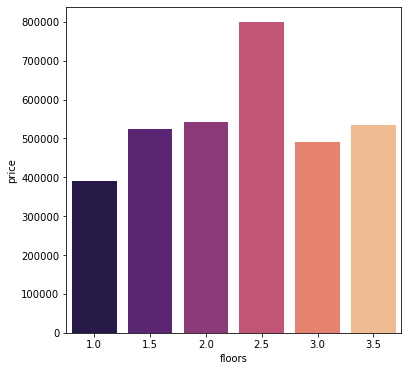

In [88]:
plt.figure(figsize=(6,6))
sns.barplot(x=df_floor.index, y=df_floor['price'], palette='magma')
plt.show()

- 2.5 floors has the highest median price

### `waterfront`

In [101]:
df.stb.freq(['waterfront'])

,waterfront,count,percent,cumulative_count,cumulative_percent
0,0,21450,99.245824,21450,99.245824
1,1,163,0.754176,21613,100.000000


In [103]:
#Median price for whatever the house has overlooking the waterfront or not
df_waterfront = df[['waterfront', 'price']].groupby(['waterfront']).median()
df_waterfront

,price
waterfront,
0,450000.0
1,1400000.0


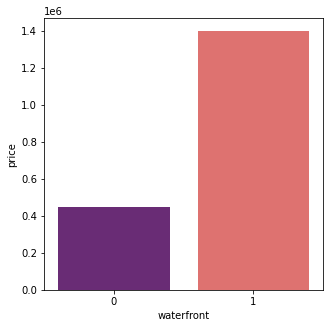

In [104]:
#Visualization using barplot
plt.figure(figsize=(5,5))
sns.barplot(x=df_waterfront.index, y=df_waterfront['price'], palette='magma')
plt.show()

- House that overlooking the waterfront has higher median house price rather than No waterfront

### `view`

In [105]:
df.stb.freq(['view'])

,view,count,percent,cumulative_count,cumulative_percent
0,0,19489,90.172581,19489,90.172581
1,2,963,4.455652,20452,94.628233
2,3,510,2.359691,20962,96.987924
3,1,332,1.536113,21294,98.524036
4,4,319,1.475964,21613,100.000000


In [106]:
#Median price for every view of the property was
df_view = df[['view', 'price']].groupby(['view']).median()
df_view

,price
view,
0,432500.0
1,690944.0
2,675000.0
3,802500.0
4,1185000.0


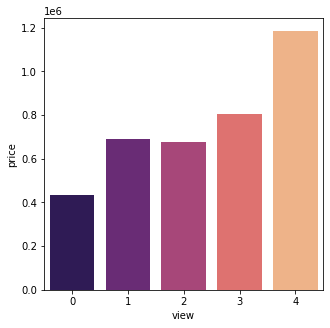

In [107]:
#Visualization using barplot
plt.figure(figsize=(5,5))
sns.barplot(x=df_view.index, y=df_view['price'], palette='magma')
plt.show()

- The better the view of property, the higher median price

### `condition`

In [108]:
df.stb.freq(['condition'])

,condition,count,percent,cumulative_count,cumulative_percent
0,3,14031,64.919262,14031,64.919262
1,4,5679,26.275852,19710,91.195114
2,5,1701,7.870263,21411,99.065377
3,2,172,0.795817,21583,99.861195
4,1,30,0.138805,21613,100.000000


In [109]:
#Median price for every condition
df_condition = df[['condition', 'price']].groupby(['condition']).median()
df_condition

,price
condition,
1,262500.0
2,279000.0
3,450000.0
4,440000.0
5,526000.0


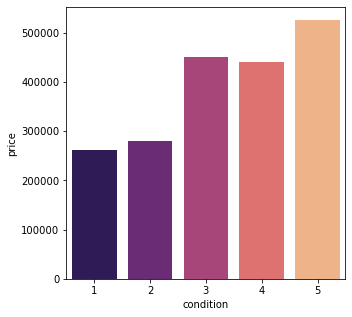

In [110]:
#Visualization using barplot
plt.figure(figsize=(5,5))
sns.barplot(x=df_condition.index, y=df_condition['price'], palette='magma')
plt.show()

- The better the condition, the higher median price

### `grade`
level of contruction and design

In [111]:
df.stb.freq(['grade'])

,grade,count,percent,cumulative_count,cumulative_percent
0,7,8981,41.553695,8981,41.553695
1,8,6068,28.075695,15049,69.629390
2,9,2615,12.099200,17664,81.728589
3,6,2038,9.429510,19702,91.158099
4,10,1134,5.246842,20836,96.404941
5,11,399,1.846111,21235,98.251053
6,5,242,1.119696,21477,99.370749
7,12,90,0.416416,21567,99.787165
8,4,29,0.134179,21596,99.921344
9,13,13,0.060149,21609,99.981493


In [113]:
#Median price for every grade
df_grade = df[['grade', 'price']].groupby(['grade']).median()
df_grade.T

grade,1,3,4,5,6,7,8,9,10,11,12,13
price,142000.0,262000.0,205000.0,228700.0,275276.5,375000.0,510000.0,720000.0,914327.0,1284000.0,1817500.0,2983000.0


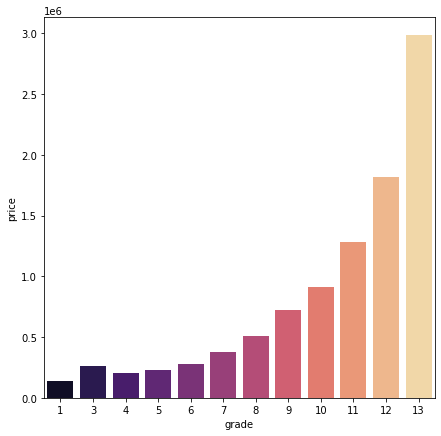

In [115]:
#Visualization using barplot
plt.figure(figsize=(7,7))
sns.barplot(x=df_grade.index, y=df_grade['price'], palette='magma')
plt.show()

- The higher of level contruction and design, the higher the median price 

### `sqft_above`

In [116]:
df.stb.freq(['sqft_above'])

,sqft_above,count,percent,cumulative_count,cumulative_percent
0,1300,212,0.980891,212,0.980891
1,1010,210,0.971637,422,1.952529
2,1200,206,0.953130,628,2.905659
3,1220,192,0.888354,820,3.794013
4,1140,184,0.851339,1004,4.645352
...,...,...,...,...,...
941,410,1,0.004627,21609,99.981493
942,384,1,0.004627,21610,99.986119
943,380,1,0.004627,21611,99.990746
944,370,1,0.004627,21612,99.995373


In [117]:
#Median price for sqft_above
df_sqft_above = df[['sqft_above', 'price']].groupby(['sqft_above']).median()
df_sqft_above.T

sqft_above,290,370,380,384,390,410,420,430,440,460,...,6720,7320,7420,7680,7850,7880,8020,8570,8860,9410
price,142000.0,276000.0,245000.0,265000.0,236500.0,325000.0,254525.0,80000.0,290000.0,247000.0,...,5350000.0,1135250.0,1950000.0,7062500.0,2700000.0,2415000.0,3300000.0,7700000.0,6885000.0,2280000.0


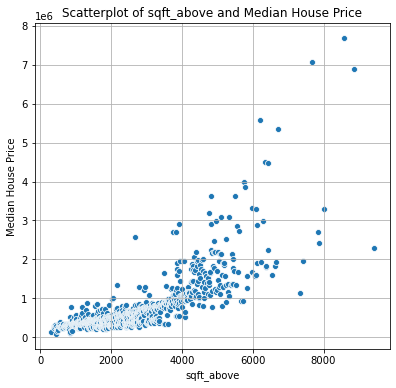

In [130]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df_sqft_above.index, y=df_sqft_above['price'])
plt.ylabel('Median House Price')
plt.title('Scatterplot of sqft_above and Median House Price')
plt.grid()
plt.show()

- From the scatterplot, it show that between sqft_above and median house price has positive correlation
- The higher sqft_above, the higher the median house price

### `sqft_basement`

In [121]:
df.stb.freq(['sqft_basement'])

,sqft_basement,count,percent,cumulative_count,cumulative_percent
0,0,13126,60.731967,13126,60.731967
1,600,221,1.022533,13347,61.754500
2,700,218,1.008652,13565,62.763152
3,500,214,0.990145,13779,63.753297
4,800,206,0.953130,13985,64.706427
...,...,...,...,...,...
301,176,1,0.004627,21609,99.981493
302,172,1,0.004627,21610,99.986119
303,143,1,0.004627,21611,99.990746
304,65,1,0.004627,21612,99.995373


In [122]:
#Median price for sqft_basement
df_sqft_basement = df[['sqft_basement', 'price']].groupby(['sqft_basement']).median()
df_sqft_basement.T

sqft_basement,0,10,20,40,50,60,65,70,80,90,...,2720,2730,2810,2850,3000,3260,3480,3500,4130,4820
price,411500.0,191900.0,485000.0,400000.0,520000.0,472500.0,378000.0,325000.0,435000.0,379900.0,...,850000.0,3800000.0,1488000.0,1385000.0,5570000.0,1900000.0,7700000.0,3200000.0,2280000.0,4668000.0


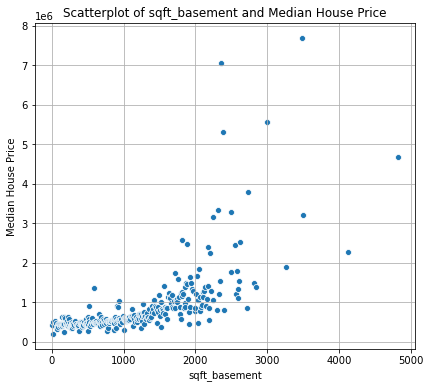

In [136]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df_sqft_basement.index, y=df_sqft_basement['price'])
plt.title('Scatterplot of sqft_basement and Median House Price')
plt.ylabel('Median House Price')
plt.grid()
plt.show()

- sqft_basement and Median House Price has positive correlation
- The higher sqft_basement, the higher Median House Price

### `yr_built`

In [138]:
df.stb.freq(['yr_built'])

,yr_built,count,percent,cumulative_count,cumulative_percent
0,2014,559,2.586406,559,2.586406
1,2006,454,2.100588,1013,4.686994
2,2005,450,2.082080,1463,6.769074
3,2004,433,2.003424,1896,8.772498
4,2003,422,1.952529,2318,10.725027
...,...,...,...,...,...
111,1933,30,0.138805,21512,99.532689
112,1901,29,0.134179,21541,99.666867
113,1902,27,0.124925,21568,99.791792
114,1935,24,0.111044,21592,99.902836


In [139]:
#Median price for yr_built'
df_yr_built = df[['yr_built', 'price']].groupby(['yr_built']).median()
df_yr_built.T

yr_built,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
price,549000.0,550000.0,624000.0,461000.0,478000.0,597500.0,555000.0,595000.0,519475.0,575500.0,...,510500.0,480000.0,500000.0,416375.0,448500.0,440000.0,448475.0,565000.0,599000.0,629500.0


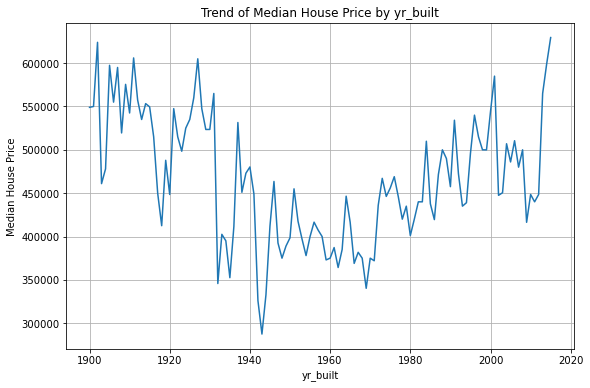

In [143]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(x=df_yr_built.index, y=df_yr_built['price'])
plt.title('Trend of Median House Price by yr_built')
plt.ylabel('Median House Price')
plt.grid()
plt.show()

- Median House Price fluktuatif for every yr_built

### `yr_renovated`

In [145]:
df.stb.freq(['yr_renovated'])

,yr_renovated,count,percent,cumulative_count,cumulative_percent
0,0,20699,95.771064,20699,95.771064
1,2014,91,0.421043,20790,96.192107
2,2013,37,0.171193,20827,96.363300
3,2003,36,0.166566,20863,96.529866
4,2007,35,0.161940,20898,96.691806
...,...,...,...,...,...
65,1954,1,0.004627,21609,99.981493
66,1951,1,0.004627,21610,99.986119
67,1948,1,0.004627,21611,99.990746
68,1944,1,0.004627,21612,99.995373


In [152]:
#Median price for yr_renovated
df_yr_renovated = df[['yr_renovated', 'price']].groupby(['yr_renovated']).median()
print(df_yr_renovated.max())
print(df_yr_renovated[df_yr_renovated['price'] == 1140000.0])
df_yr_renovated.T

price    1140000.0
dtype: float64
                  price
yr_renovated           
1956          1140000.0


yr_renovated,0,1934,1940,1944,1945,1946,1948,1950,1951,1953,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
price,448000.0,459950.0,378400.0,521000.0,375000.0,351137.5,410000.0,291450.0,276000.0,247500.0,...,654050.0,797000.0,801500.0,521000.0,845000.0,577000.0,515000.0,560000.0,575000.0,651000.0


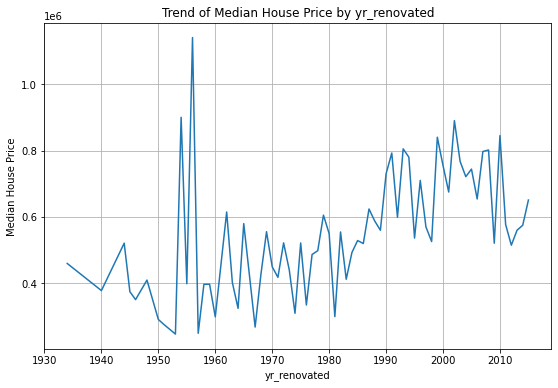

In [150]:
# df_yr_renovated without 0
df_yr = df_yr_renovated[df_yr_renovated.index != 0 ]

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(x=df_yr.index, y=df_yr['price'])
plt.title('Trend of Median House Price by yr_renovated')
plt.ylabel('Median House Price')
plt.grid()
plt.show()

- overall the median house price for yr_renovated is fluktuatif 
- in 1956 has the highest median house price

### `zipcode`

In [154]:
df.stb.freq(['zipcode'])

,zipcode,count,percent,cumulative_count,cumulative_percent
0,98103,602,2.785361,602,2.785361
1,98038,590,2.729839,1192,5.515199
2,98115,583,2.697451,1775,8.212650
3,98052,574,2.655809,2349,10.868459
4,98117,553,2.558645,2902,13.427104
...,...,...,...,...,...
65,98102,105,0.485819,21325,98.667469
66,98010,100,0.462684,21425,99.130153
67,98024,81,0.374774,21506,99.504928
68,98148,57,0.263730,21563,99.768658


In [155]:
#Median price for zipcode
df_zipcode = df[['zipcode', 'price']].groupby(['zipcode']).median()
df_zipcode.T

zipcode,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,260000.0,235000.0,267475.0,1150000.0,765475.0,760184.5,555000.0,545000.0,359999.5,470000.0,...,305000.0,278000.0,375000.0,390000.0,235000.0,554000.0,278277.0,264000.0,265000.0,689800.0


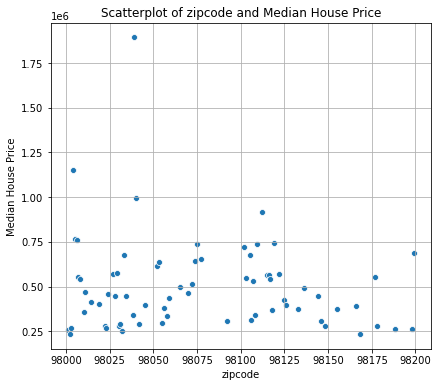

In [156]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df_zipcode.index, y=df_zipcode['price'])
plt.title('Scatterplot of zipcode and Median House Price')
plt.ylabel('Median House Price')
plt.grid()
plt.show()

### `'lat', 'long'`

In [158]:
import folium

In [159]:
map = folium.Map(location = [47.5112, -122.257], tiles='OpenStreetMap', zoom_start=17)

for i in range(len(df)):
    location = [df['lat'][i], df['long'][i]]
    name = df['id'][i]
    
    folium.Marker([47.5112, -122.257],
              tooltip='<img width="100px"> {name}',
              popup='House',  #muncul ketika di klik
              icon = folium.Icon(color='red',icon='info-sign')
                 ).add_to(map)

In [161]:
# map

### `sqft_living15`

In [163]:
df.stb.freq(['sqft_living15'])

,sqft_living15,count,percent,cumulative_count,cumulative_percent
0,1540,197,0.911488,197,0.911488
1,1440,195,0.902235,392,1.813723
2,1560,192,0.888354,584,2.702077
3,1500,181,0.837459,765,3.539536
4,1460,169,0.781937,934,4.321473
...,...,...,...,...,...
772,828,1,0.004627,21609,99.981493
773,806,1,0.004627,21610,99.986119
774,770,1,0.004627,21611,99.990746
775,670,1,0.004627,21612,99.995373


In [164]:
#Median price for sqft_living15
df_sqft_living15 = df[['sqft_living15', 'price']].groupby(['sqft_living15']).median()
df_sqft_living15.T

sqft_living15,399,460,620,670,690,700,710,720,740,750,...,5220,5330,5340,5380,5500,5600,5610,5790,6110,6210
price,536000.0,317750.0,260000.0,314000.0,242000.0,282475.0,301975.0,344950.0,247500.0,213800.0,...,2480000.0,1150000.0,1575000.0,1110000.0,2408000.0,1250000.0,1950000.0,1750000.0,2983000.0,2700000.0


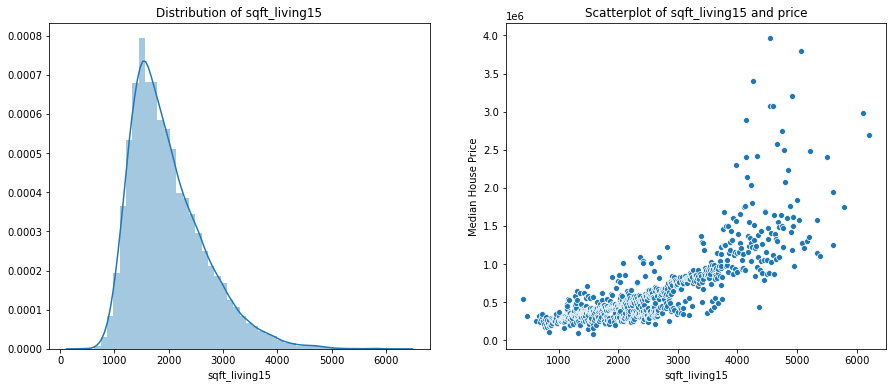

In [167]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['sqft_living15'])
plt.title('Distribution of sqft_living15')

plt.subplot(1,2,2)
sns.scatterplot(x=df_sqft_living15.index, y='price', data=df_sqft_living15)
plt.ylabel('Median House Price')
plt.title('Scatterplot of sqft_living15 and price')

plt.show()

- sqft_living15 has right-skewed distribution
- sqft_living15 and median house price has positif correlation
- the wider the sqft_living15, the higher the median house price

### `sqft_lot15`

In [169]:
df.stb.freq(['sqft_lot15'])

,sqft_lot15,count,percent,cumulative_count,cumulative_percent
0,5000,427,1.975663,427,1.975663
1,4000,357,1.651784,784,3.627446
2,6000,289,1.337158,1073,4.964605
3,7200,211,0.976264,1284,5.940869
4,4800,145,0.670893,1429,6.611761
...,...,...,...,...,...
8684,757,1,0.004627,21609,99.981493
8685,755,1,0.004627,21610,99.986119
8686,660,1,0.004627,21611,99.990746
8687,659,1,0.004627,21612,99.995373


In [170]:
#Median price for sqft_lot15
df_sqft_lot15 = df[['sqft_lot15', 'price']].groupby(['sqft_lot15']).median()
df_sqft_lot15.T

sqft_lot15,651,659,660,748,750,755,757,758,788,794,...,386812,392040,411962,422967,425581,434728,438213,560617,858132,871200
price,299900.0,286308.0,290000.0,331750.0,335850.0,335000.0,346100.0,305000.0,420000.0,530000.0,...,370000.0,490000.0,1998000.0,858000.0,700000.0,637000.0,549950.0,790000.0,1600000.0,937500.0


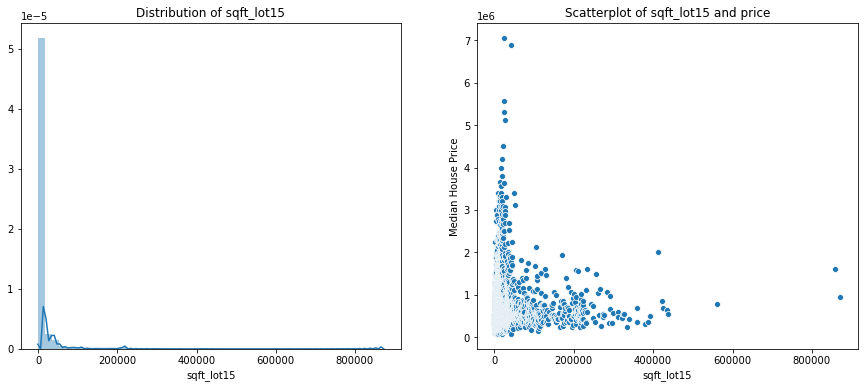

In [171]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['sqft_lot15'])
plt.title('Distribution of sqft_lot15')

plt.subplot(1,2,2)
sns.scatterplot(x=df_sqft_lot15.index, y='price', data=df_sqft_lot15)
plt.ylabel('Median House Price')
plt.title('Scatterplot of sqft_lot15 and price')

plt.show()